<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/FNNSinRowSequenceWithoutActivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers

mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.2
# mpl.rcParams['lines.linestyle'] = '-.'

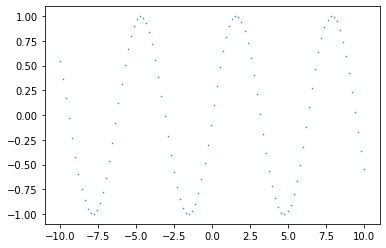

In [2]:
# pi/2 * 1 = 90
# pi/2 * 2 = 180
# pi/2 * 3 = 270
# pi/2 * 4 = 360
radians = np.linspace(-10, 10, 100)
data = np.sin(radians)
plt.scatter(radians, data)

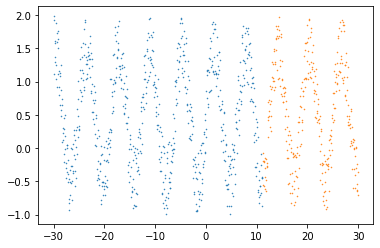

In [3]:
def get_input(start, end, num, timesteps):
  radians = np.linspace(start, end, num + timesteps)
  sin = np.sin(radians) + np.random.random(num + timesteps)
  return radians, sin

hidden_units = 32
timesteps = 20
input_dim = 1
output_dim = 1

data_n = 1000
data_x, data_y = get_input(-30, 30, data_n, timesteps)

train_n = int(data_n * 0.7)
test_n = int(data_n * 0.3)
train_x, train_y = data_x[:train_n], data_y[:train_n]
test_x, test_y = data_x[train_n:], data_y[train_n:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

In [4]:
def make_sequence(input, timesteps):
  x = list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps)))
  y = input[timesteps:]
  # return np.reshape(x, (-1, timesteps, input_dim)), np.reshape(y, (-1, input_dim))
  return np.array(x), np.array(y)

def test_sequence(n=3):
  print(make_sequence([0, 1, 2, 3, 4, 5, 6], n))
test_sequence()

train_seq_x, train_seq_y = make_sequence(train_y, timesteps)
test_seq_x, test_seq_y = make_sequence(test_y, timesteps)

print(train_seq_x.shape, train_seq_y.shape)

(array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]]), array([3, 4, 5, 6]))
(680, 20) (680,)


In [9]:
def make_fnn_model():
  model = models.Sequential()
  model.add(layers.Input(shape=(timesteps,)))
  model.add(layers.Dense(timesteps * 8))
  model.add(layers.Dense(timesteps * 4))
  model.add(layers.Dense(timesteps * 2))    
  model.add(layers.Dense(output_dim))
  model.compile(loss='mse')
  model.summary()
  return model

def make_model():
  model = models.Sequential()
  model.add(layers.SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
  model.add(layers.Dense(output_dim))
  model.compile(loss='mse')
  model.summary()
  return model
 
model = make_fnn_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 160)               3360      
                                                                 
 dense_5 (Dense)             (None, 80)                12880     
                                                                 
 dense_6 (Dense)             (None, 40)                3240      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


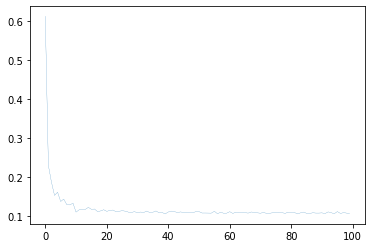

In [10]:
history = model.fit(train_seq_x, train_seq_y, epochs=100, verbose=0)
plt.plot(history.history['loss'])


In [11]:
test_loss = model.evaluate(test_seq_x, test_seq_y)

10/10 [==============================] - 0s 2ms/step - loss: 0.1173


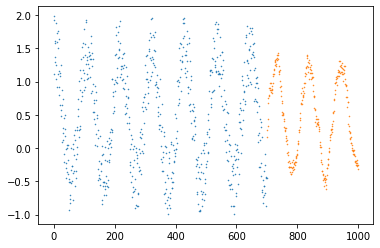

In [12]:
predicted_y = model.predict(test_seq_x)

plt.scatter(np.arange(len(train_y)), train_y)
plt.scatter(np.arange(len(train_y), len(train_y) + len(predicted_y)), predicted_y)